In [1]:
#  Load Libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , LogisticRegression
from mlxtend.plotting import plot_decision_regions , plot_confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#  Load dataset 

df = pd.read_csv("Dataset .csv")

In [3]:
df.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270


In [4]:

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [5]:
#  checking the null values

df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [6]:
#  cusienes column has 9 missing values

# Data Preprocessing

In [7]:
# Handle missing values by filling with the mode
df['Cuisines'].fillna(df['Cuisines'].mode()[0], inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_2248\717271624.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cuisines'].fillna(df['Cuisines'].mode()[0], inplace=True)


In [8]:
# Columns to drop (unique identifiers and highly verbose columns)
columns_to_drop = ['Restaurant ID', 'Restaurant Name', 'Address', 'Locality Verbose']

In [9]:
# Drop the columns
df.drop(columns=columns_to_drop, inplace=True)

In [10]:
# Label encode categorical variables
categorical_columns = ['City', 'Locality', 'Cuisines', 'Currency', 'Has Table booking',
                       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
                       'Rating color', 'Rating text']

In [11]:
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [12]:
# Split the data into features and target variable

X = df.drop(columns=['Aggregate rating'])
y = df['Aggregate rating']

In [13]:

# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [14]:
# Shapping the data

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7640, 16), (1911, 16), (7640,), (1911,))

# Step 2: Select and Train a Regression Model


# 1st TRY - Linear Regression Model

In [15]:
# Train a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate the Linear Regression model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

(mse_lr)*100, (r2_lr)*100


(127.247503553242, 44.094283667874755)

# Decision Tree Model

In [16]:
# Train a Decision Tree Regression model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the Decision Tree Regression model
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

(mse_dt)*100, (r2_dt)*100

(5.623233908948193, 97.52945314442802)

In [39]:
# Train a Decision Tree Regression model

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the Decision Tree Regression model
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f'MSE: {(mse_dt)*100}')
print(f'R-squared: {(r2_dt*100)}')

MSE: 5.623233908948193
R-squared: 97.52945314442802


In [40]:
dt_model.score(X_train, y_train)*100

100.0

In [41]:
dt_model.score(X_test, y_test)*100

97.52945314442802

# Steps to Validate Model Performance

In [42]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(dt_model, X, y, cv=5)
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean CV Score: {cv_scores.mean()}')


Cross-Validation Scores: [0.96817909 0.97232087 0.97730139 0.97500686 0.97710549]
Mean CV Score: 0.973982739465286


# Regularization

In [43]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)





RandomForestRegressor(random_state=42)

In [44]:
rf_model.score(X_train, y_train)*100

99.82060474174213

In [45]:
rf_model.score(X_test, y_test)*100

98.71163947241686

In [46]:
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest MSE: {mse_rf}')
print(f'Random Forest R-squared: {r2_rf}')

Random Forest MSE: 0.029324489795918344
Random Forest R-squared: 0.9871163947241687


# Hyperparameter Tuning:

In [47]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='r2')

grid_search.fit(X_train, y_train)

print(f'Best Parameters: {grid_search.best_params_}')
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f'Best Model MSE: {mse_best}')
print(f'Best Model R-squared: {r2_best}')


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best Model MSE: 0.0306703139923635
Best Model R-squared: 0.9865251118804319


In [48]:
grid_search.score(X_train, y_train)*100

98.88546816861812

In [49]:
grid_search.score(X_test, y_test)*100

98.65251118804319

In [50]:
df.isnull().sum()

Country Code            0
City                    0
Locality                0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [51]:
features = ["Cuisines" ,"Aggregate rating" ,"Votes"]
x_new = df.iloc[:,:-1]
y_new = df[features]

In [52]:
x_new_train , x_new_test, y_new_train , y_new_test = train_test_split(x_new,y_new, test_size=0.2 , random_state=42)

In [53]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [54]:
lr.score(X_train, y_train)*100

45.314181154044064

In [55]:
lr.score(X_test, y_test)*100

44.094283667874755

# Final Steps

In [56]:
# 

from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='r2')
print(f'Cross-Validation R-squared Scores: {cv_scores}')
print(f'Mean Cross-Validation R-squared: {cv_scores.mean()}')


Cross-Validation R-squared Scores: [0.97884117 0.98275032 0.9866871  0.98647772 0.98590774]
Mean Cross-Validation R-squared: 0.9841328072804361


In [57]:
# Feature Importance:

feature_importances = best_model.feature_importances_
features = X.columns

importances_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

print(importances_df)



                 Feature  Importance
15                 Votes    0.907882
13          Rating color    0.082911
14           Rating text    0.007485
4               Latitude    0.000483
3              Longitude    0.000389
6   Average Cost for two    0.000306
5               Cuisines    0.000274
2               Locality    0.000107
8      Has Table booking    0.000048
9    Has Online delivery    0.000036
12           Price range    0.000035
1                   City    0.000029
7               Currency    0.000014
0           Country Code    0.000000
10     Is delivering now    0.000000
11  Switch to order menu    0.000000


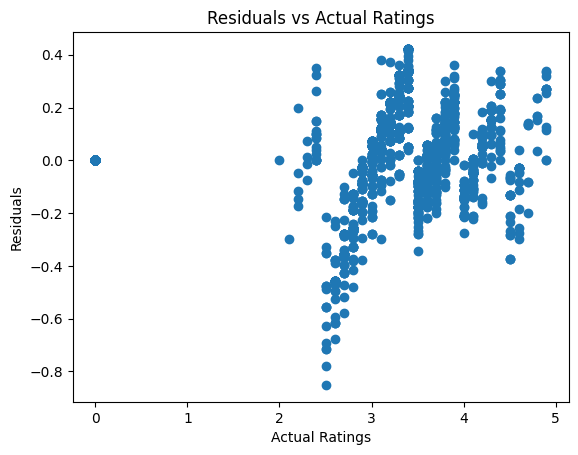

In [58]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred_best
plt.scatter(y_test, residuals)
plt.xlabel('Actual Ratings')
plt.ylabel('Residuals')
plt.title('Residuals vs Actual Ratings')
plt.show()


In [59]:
import joblib

# Assuming `best_model` is your trained model
joblib.dump(best_model, 'restaurant_rating_model.pkl')

['restaurant_rating_model.pkl']

# Step 3: Evaluate the Models

# Step 4: Interpret the Model's Results

In [38]:
feature_importances = dt_model.feature_importances_
features = X.columns

importances_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

print(importances_df)


                 Feature  Importance
15                 Votes    0.899631
13          Rating color    0.081987
14           Rating text    0.007401
4               Latitude    0.002868
3              Longitude    0.002496
5               Cuisines    0.001737
6   Average Cost for two    0.001645
2               Locality    0.001361
9    Has Online delivery    0.000348
1                   City    0.000197
12           Price range    0.000164
8      Has Table booking    0.000104
7               Currency    0.000027
0           Country Code    0.000021
10     Is delivering now    0.000013
11  Switch to order menu    0.000000
